In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [4]:
#perform weather check on each city using a series of successive API calls
#include a print log of each city as it's being processed with city number and city name

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#url for GET requests
# url = "http://api.openweathermap.org/data/2.5/weather?q={city name}&appid={api_key}"

response = requests.get(url).json()

# Set empty lists to hold city weather data
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cities_list = []
lat = []
lng = []

# # Loop through each character
for city in cities:
    
#     # Create search query, make request and store in json
    query = query_url + city
    print(query)
    response = requests.get(query)
    response_json = response.json()
    print(response_json)
    
#     # Try to grab the weather data from API
    try:
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        cities_list.append(city)
        
        
        
#     # Handle exceptions for a character that is not available in the openweather API
    except:
        # Append null values
        print("City not found. Skipping...")
#         pass
        

#perform weather check on each city using successive API calls with print log
        

http://api.openweathermap.org/data/2.5/weather?appid=2e8fc0916833705cacba448ba47295ea&units=metric&q=kapaa
{'coord': {'lon': -159.32, 'lat': 22.08}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 25.85, 'feels_like': 22.9, 'temp_min': 25, 'temp_max': 27, 'pressure': 1020, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 9.3, 'deg': 70, 'gust': 12.3}, 'rain': {'1h': 1.02}, 'clouds': {'all': 20}, 'dt': 1605153958, 'sys': {'type': 1, 'id': 7873, 'country': 'US', 'sunrise': 1605113243, 'sunset': 1605153335}, 'timezone': -36000, 'id': 5848280, 'name': 'Kapaa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=2e8fc0916833705cacba448ba47295ea&units=metric&q=taolanaro
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=2e8fc0916833705cacba448ba47295ea&units=metric&q=venice
{'coord': {'lon': -82.45, 'lat': 27.1}, 'weather'

In [42]:
#append data to a Pandas dataframe

weather_df = pd.DataFrame({"City": cities_list,
                           "Country": country,
                           "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Date": date,
                          "Latitude": lat,
                          "Longitude": lng})

weather_df.head()


,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Latitude,Longitude
0,kapaa,US,27.00,69,20,9.30,1605153958,22.08,-159.32
1,venice,US,26.11,94,90,8.70,1605153939,27.10,-82.45
2,hami,CN,10.16,40,0,1.38,1605153959,42.80,93.45
3,indian head,US,20.56,100,75,4.02,1605153959,38.60,-77.16
4,albany,US,16.11,81,100,3.25,1605153960,42.60,-73.97


In [43]:
#export dataframe to CSV for future use so I don't have to run the API call again 
weather_df.to_csv(r'weather_data.csv')

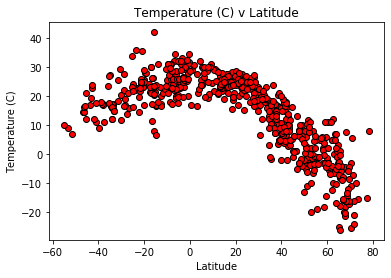

In [44]:
#create scatter plots showing different weather relationships

plt.scatter(lat, max_temp, marker="o", facecolors="red", edgecolors="black")
plt.title("Temperature (C) v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.savefig("WeatherPy\tempvslat.png")
plt.show()


This plot is analyzing if there is any relationship between temperature and latitude. 

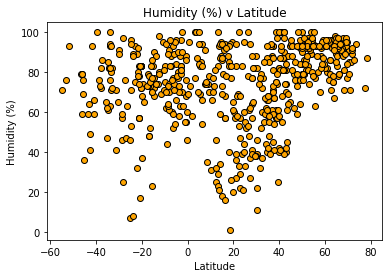

In [45]:
plt.scatter(lat, humidity, marker="o", facecolors="orange", edgecolors="black")
plt.title("Humidity (%) v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("WeatherPy\humidityvslat.png")
plt.show()

This plot is analyzing if there is any relationship between humidity and latitude.  

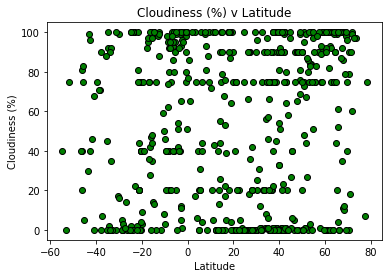

In [46]:
plt.scatter(lat, cloudiness, marker="o", facecolors="green", edgecolors="black")
plt.title("Cloudiness (%) v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("WeatherPy\cloudsvslat.png")
plt.show()

This plot is analyzing if there is any relationship between cloudiness and latitude.

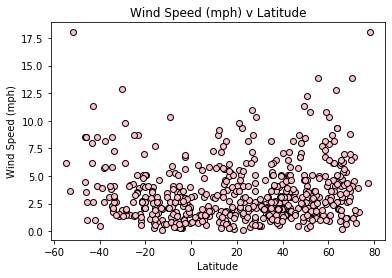

In [47]:
plt.scatter(lat, wind_speed, marker="o", facecolors="pink", edgecolors="black")
plt.title("Wind Speed (mph) v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("WeatherPy\windvslat.png")
plt.show()

This plot is analyzing if there is any relationship between wind speed and latitude.

In [48]:
north_hem = weather_df.loc[weather_df["Latitude"] > 0]
south_hem = weather_df.loc[weather_df["Latitude"] < 0]

len(north_hem["Max Temp"])


387

In [49]:
south_hem.head()

,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Latitude,Longitude
5,mataura,NZ,14.44,79,40,8.49,1605153960,-46.19,168.86
6,saint-philippe,RE,25.00,57,20,2.60,1605153960,-21.36,55.77
9,christchurch,NZ,17.00,59,30,6.20,1605153867,-43.53,172.63
12,punta arenas,CL,9.00,76,0,3.60,1605153961,-53.15,-70.92
15,ushuaia,AR,10.00,71,40,6.20,1605153962,-54.80,-68.30


The r-squared is: 0.7691041841925637


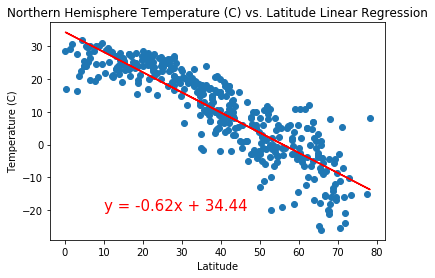

In [64]:
# #linear regression for temperature vs latitude
x_values = north_hem['Latitude']
y_values = north_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Northern Hemisphere Temperature (C) vs. Latitude Linear Regression')
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("nohem_temp.png")
plt.show()

The r-squared is: 0.34179576022678837


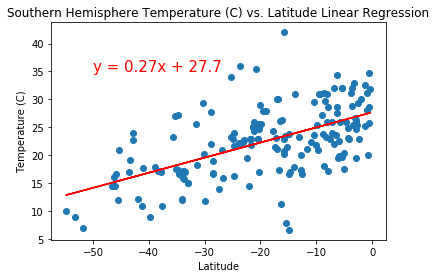

In [65]:
x_values = south_hem['Latitude']
y_values = south_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Southern Hemisphere Temperature (C) vs. Latitude Linear Regression')
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("sohem_temp.png")
plt.show()

The r-squared is: 0.15432567516044052


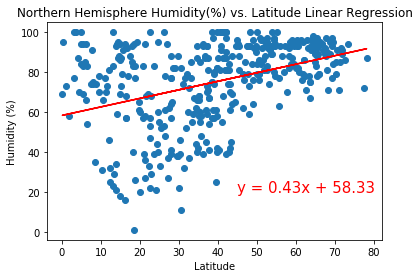

In [66]:
x_values = north_hem['Latitude']
y_values = north_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Northern Hemisphere Humidity(%) vs. Latitude Linear Regression')
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("nohem_humid.png")
plt.show()

The r-squared is: 0.011859644289192305


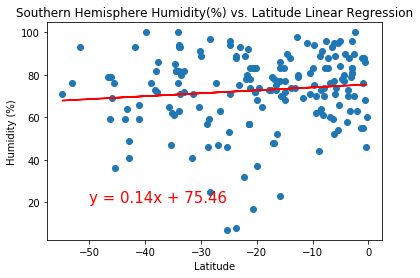

In [69]:
x_values = south_hem['Latitude']
y_values = south_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Southern Hemisphere Humidity(%) vs. Latitude Linear Regression')
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("sohem_humid.png")
plt.show()

The r-squared is: 0.06800286707584575


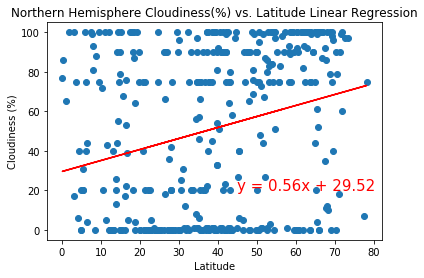

In [68]:
x_values = north_hem['Latitude']
y_values = north_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Northern Hemisphere Cloudiness(%) vs. Latitude Linear Regression')
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("nohem_clouds.png")
plt.show()

The r-squared is: 0.08521652605777826


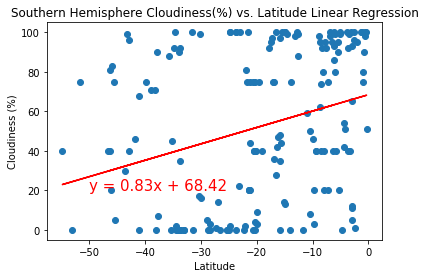

In [70]:
x_values = south_hem['Latitude']
y_values = south_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Southern Hemisphere Cloudiness(%) vs. Latitude Linear Regression')
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("sohem_clouds.png")
plt.show()

The r-squared is: 0.037211551718183015


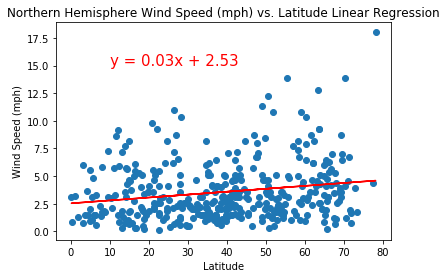

In [72]:
x_values = north_hem['Latitude']
y_values = north_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Northern Hemisphere Wind Speed (mph) vs. Latitude Linear Regression')
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("nohem_wind.png")
plt.show()

The r-squared is: 0.15625280248132956


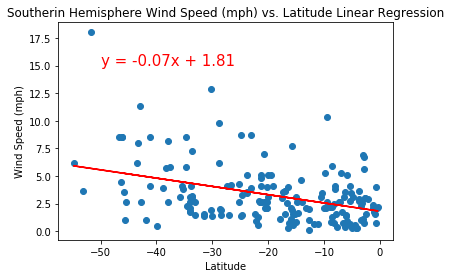

In [74]:
x_values = south_hem['Latitude']
y_values = south_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Southerin Hemisphere Wind Speed (mph) vs. Latitude Linear Regression')
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("sohem_wind.png")
plt.show()